# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [27]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [105]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.head(1)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

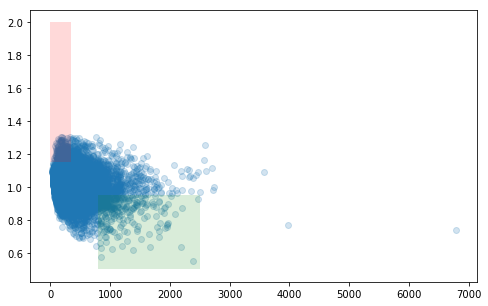

In [20]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# Your turn

A. Preliminary observations provided by the government

   * 1) Overall, rate of readmissions is trending down with increasing number of discharges
    
   * 2) With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

   * 3) With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

Let us analyze the above observations.

In [112]:
#read the dataset provided
hospitals = pd.read_csv('data/cms_hospital_readmissions.csv')
hospitals.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

 * The formula for calculating Excess Readmission Ratio as per CMS is as follows:
     * Excess readmission ratio = risk-adjusted predicted readmissions/risk-adjusted expected readmissions
     
     
 * From the multiple variables present in the dataset, I am only interested in Excess Readmission Ratio, Number of readmissions and Number of discharges. Rest of the variables are either irrelavent or are already considered while calculating the ratio.
    

* Since we are trying to critique the preliminary analysis, I would further narrow down my study to Number of discharges and Excess Readmission ratio.

In [113]:
# Dealing with missing values for the variables under study (# of discharges and Excess Readmission Ratio)
hospitals_clean = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
hospitals_clean.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [120]:
data = hospitals_clean[['Number of Discharges','Excess Readmission Ratio']]
discharges = list(data['Number of Discharges'])
excessreadm = data['Excess Readmission Ratio']

## Let us first take a look at the spread of Excess Readmission ratio

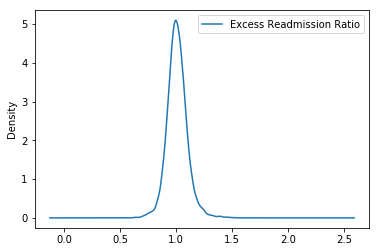

In [122]:
# Plot a density graph to see the distribution of Excess Readmission Ratio sample data
excessreadm.plot(kind='density',legend= True)

In [130]:
excessreadm.describe()

count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

* This variable seems to follows a normal distribution with a mean of 1.007 and std deviation of 0.09. 
* We can also test hypothesis and perform One sample t-test for future study.

In [208]:
# Statistics of Excess Readmission Ratio
excessreadm.describe()

count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

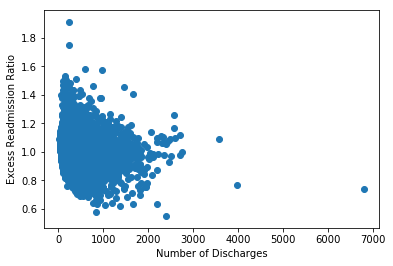

In [209]:
# Lets visually see the kind of relation that exists between Excessive Readmission rate and Number of Discharges
plt.scatter(discharges,excessreadm)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')

The above scatter plot indicates that there is neither a positive nor a negative relationship between the two variables. Hence we can conclude that there is no correlation between the two. 

* Using the above graph and analysis let us evaluate the following preliminary observations provided by the government

    1) Overall, rate of readmissions is trending down with increasing number of discharges
    
    2) With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

    3) With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)


* All the above 3 points indicate to an existance of either a positive or a negative correlation between Excess Readmission ratio and Number of discahrges.
* But from what we see in the scatter plot, we can conclude with confidence that there is neither a positive nor a negative relationship between the two variables and hence all the above conclusions are FALSE.

______________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________

B. Statistical Analysis conducted by the Government    

   * In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
    
   * In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
    

In [139]:
# creating two datasets. One with # of discharges > 1000 and other with < 100
large_hosp = data[data['Number of Discharges'].astype(int) > 1000]
small_hosp = data[data['Number of Discharges'].astype(int) <= 100]

In [142]:
# Statistics of hospitals with less than 100 discharges
small_hosp.describe()

,Excess Readmission Ratio
count,1223.000000
mean,1.022088
std,0.058154
min,0.893500
25%,0.983800
50%,1.016700
75%,1.052750
max,1.495300


In [197]:
small_hosp_1 = pd.DataFrame(small_hosp['Excess Readmission Ratio'] > 1)

In [198]:
small_hosp_1.groupby('Excess Readmission Ratio').size()

Excess Readmission Ratio
False    538
True     766
dtype: int64

In [191]:
print("% of small hospitals with Excess Readmission Ratio > 1 is: ", (766/(538+766)*100),"%")

% of small hospitals with Excess Readmission Ratio > 1 is:  58.742331288343564 %


* Hence it is true that the mean Excess Admission Ratio in hospitals with < 100 discharges is 1.023 but only 58% of them have Readmission Ratio greater than 1. Hence the first statistic conclusion is only partially right.

In [144]:
# Statistics of hospitals with gretaer than 1000 discharges
large_hosp.describe()

,Excess Readmission Ratio
count,463.000000
mean,0.978335
std,0.120007
min,0.549500
25%,0.907900
50%,0.986400
75%,1.057100
max,1.454300


In [192]:
large_hosp_1 = pd.DataFrame(large_hosp['Excess Readmission Ratio'] > 1)

In [199]:
large_hosp_1.groupby('Excess Readmission Ratio').size()

Excess Readmission Ratio
False    257
True     206
dtype: int64

In [200]:
print("% of large hospitals with Excess Readmission Ratio > 1 is: ", (206/(206+257)*100),"%")

% of large hospitals with Excess Readmission Ratio > 1 is:  44.49244060475162 %


 * The second statistical conclusions turns out o be true. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have readmission ratio greater than 1.

* But how did they arrive at a decission of  < 100 discharges being small hospitals and > 1000 being large hospitals? Was there any basis? If there was then we can do a further research on how significant the difference in mean Excess Readmission Ratios for the two groups is by condcting a t-test.

______________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________

C. Conclusions from the priliminary study condected by the goverment.
       
   * There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
    
   * Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [201]:
readmissions = list(hospitals_clean['Number of Readmissions'])
discharges = list(hospitals_clean['Number of Discharges'])

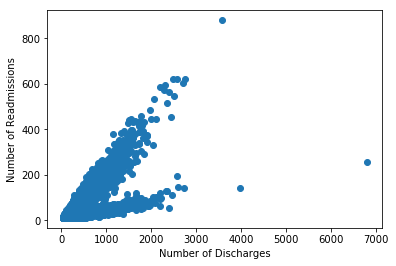

In [207]:
plt.scatter(discharges,readmissions)
plt.ylabel('Number of Readmissions')
plt.xlabel('Number of Discharges')

* There certainly is a positive correaltion between the two variables. We can say that as the capacity of hospitals is increasing, the number of readmissions are also increasing.  
   Hence the first conclusion made by government is true. There is a significant correlation between hospital capacity (number of discharges) and readmission rates.


* Perspectives for future and further study:
     * As the Number of Discharges (referred as capacity of the facility) increase, the number of readmisssions have also increased. 
     Can we conclude that the quality of treatment is getting diluted for bigger hospitals? or Is it that the percentage of Readmissions w.r.t capacity of facility is a very small number in case of larger hospitals and vice-versa for smaller hospitals and hence smaller hospitals are lacking quality care? 

* We cannot say anything about the situation with any amount of certainity at this point. Further study has to be performed inorder to draw statistically significant conclusions from the analysis.
Hence second conclusion make by the government cannot be confirmed at this point in study.